# Data Exploration - 4

## Carga de datos
Se realiza carga de datos obtenidos mediante web crawling a pollstar.com

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
from pandas.plotting import lag_plot
import numpy  as np

In [3]:
# Se utiliza para agregar campo pais a la data cargada
def separator(x):
    ciudad, estado_pais = x.split(',', 1)
    if (len(estado_pais.strip()) == 2):
        estado_pais = "USA"
    elif ("Canada" in estado_pais):
         estado_pais = "Canada"
    return ciudad.strip(), estado_pais.strip()

In [4]:
filename = "/home/bberrios/experimento-1/filtrar/live_boxoffice-all-2.txt"
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')
events = pd.read_csv(filename, sep='\t', parse_dates=['StartPlayDate'], date_parser=dateparse)
events['city'], events['country'] = zip(*events['cityStateCountry'].apply(separator))
events.head()

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
0,2018-05-05,KENNY CHESNEY,Kenny Chesney,U.S. Bank Stadium,"Minneapolis, MN",48255,48255,100,29.00,260.00,4999184,US DOLLAR,4999184,1,Minneapolis,USA
1,2018-05-04,FOO FIGHTERS,Foo Fighters,Bridgestone Arena,"Nashville, TN",13537,13537,100,49.00,99.00,1264443,US DOLLAR,1264443,1,Nashville,USA
2,2018-05-02,SPRINGSTEEN ON BROADWAY,Springsteen On Broadway / Bruce Springsteen,Walter Kerr Theatre,"New York, NY",3792,948,100,75.00,850.00,1928605,US DOLLAR,1928605,4,New York,USA
3,2018-05-01,DON BROCO,Don Broco,Keele University,"Keele, United Kingdom",797,1100,73,25.00,28.00,27432,UK Pounds,19937,1,Keele,United Kingdom
4,2018-05-01,DARYL HALL JOHN OATES,Daryl Hall & John Oates / Train,Golden 1 Center,"Sacramento, CA",8840,10259,87,45.97,125.97,650141,US DOLLAR,650141,1,Sacramento,USA


## Búsqueda de artistas con éxitos y con fracasos

Se agruparan eventos por artistas y se calculara máxima y mínima venta de tickets ( > 80% y < 60%)

In [47]:
grouping_artist = events.groupby('sortName', as_index = False)
grouping_artist_aggregate = grouping_artist['capacityPercentage'].agg(['max', 'min', 'mean', 'std','count']).replace(np.nan, 0, regex=True)
grouping_artist_aggregate=grouping_artist_aggregate.reset_index()
extrems_1 = grouping_artist_aggregate[
    (grouping_artist_aggregate['max'] >= 80) & (grouping_artist_aggregate['min'] <= 60)]
print "Cantidad: ", len(extrems_1)
extrems_1


Cantidad:  183


,sortName,max,min,mean,std,count
22,AARON WATSON,100,15,56.428571,27.837967,7
27,ACADEMIC,100,40,70.000000,42.426407,2
33,ADAM TRENT,89,30,62.250000,28.825625,4
46,ALAN DOYLE,100,25,70.666667,40.079088,3
50,ALBERT HAMMOND JR,85,51,72.333333,18.583146,3
55,ALICE COOPER,100,49,78.500000,19.978560,8
58,ALICIA VILLARREAL,81,52,66.500000,11.902381,4
63,ALTAN,100,27,74.000000,40.779897,3
68,AMANDA PALMER,100,60,80.000000,28.284271,2
70,AMAZING GRACE THE MUSICAL,100,29,64.500000,50.204581,2


Se agruparan eventos por artistas y se calculara máxima y mínima venta de tickets ( 100% y < 63%)

In [48]:
grouping_artist = events.groupby('sortName', as_index = False)
grouping_artist_aggregate = grouping_artist['capacityPercentage'].agg(['max', 'min', 'mean', 'std','count']).replace(np.nan, 0, regex=True)
grouping_artist_aggregate=grouping_artist_aggregate.reset_index()
extrems_examples = grouping_artist_aggregate[
    (grouping_artist_aggregate['max'] == 100) & (grouping_artist_aggregate['min'] <= 30)]
extrems_examples.sort_values(by = ['max', 'min'] , ascending = [0, 1])[:10]

,sortName,max,min,mean,std,count
191,BIG DADDY WEAVE,100,10,70.000000,51.961524,3
1511,RAIN A TRIBUTE TO THE BEATLES,100,12,70.423077,23.056753,26
22,AARON WATSON,100,15,56.428571,27.837967,7
1225,MEN ARE FROM MARS WOMEN ARE FROM VENUS LIVE,100,18,71.833333,33.653628,6
1290,MONOPHONICS,100,20,60.000000,56.568542,2
1556,RIPE,100,21,67.750000,36.754818,4
773,HARLEM GLOBETROTTERS,100,22,61.263158,24.071288,19
824,ILLUSIONISTS,100,22,80.318182,22.065673,22
1071,LAST REVEL,100,23,74.333333,44.455971,3
46,ALAN DOYLE,100,25,70.666667,40.079088,3


¿En qué lugares se presentó "BIG DADDY WEAVE"?

In [53]:
big = events[events.sortName == 'BIG DADDY WEAVE']
big

,StartPlayDate,sortName,eventName,venue,cityStateCountry,numTicketSold,capacity,capacityPercentage,ticketPriceFrom,ticketriceTo,grossUSD,currency,grossGate,numShows,city,country
1793,2018-03-18,BIG DADDY WEAVE,Big Daddy Weave,Calvary Church,"Naperville, IL",2658,2658,100,15.0,75.0,64458,US DOLLAR,64458,1,Naperville,USA
1864,2018-03-17,BIG DADDY WEAVE,Big Daddy Weave,Masonic Temple,"Freeport, IL",935,935,100,15.0,75.0,21342,US DOLLAR,21342,1,Freeport,USA
3034,2018-02-22,BIG DADDY WEAVE,Big Daddy Weave,Cooper City Church Of God,"Cooper City, FL",140,1400,10,15.0,75.0,34252,US DOLLAR,34252,1,Cooper City,USA


<BarContainer object of 3 artists>

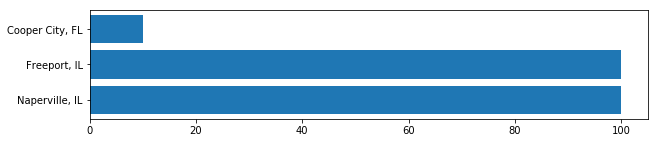

In [55]:
plt.figure(figsize=(10, 2))
plt.barh(big['cityStateCountry'].tolist(), big['capacityPercentage'])

¿En qué lugares se presentó "RAIN A TRIBUTE TO THE BEATLES"?

In [50]:
rain = events[events['sortName'].str.contains('RAIN')]

<BarContainer object of 27 artists>

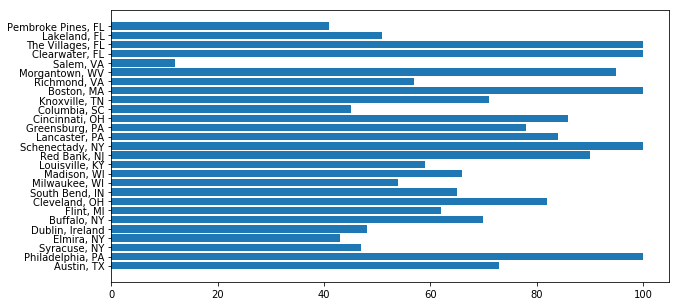

In [51]:

plt.figure(figsize=(10, 5))
plt.barh(rain['cityStateCountry'].tolist(), rain['capacityPercentage'])